In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Features_csv/restaurants_full.csv')

In [3]:
df['Cuisines']

0                    ['Cafe', 'European', 'Healthy']
1       ['Irish', 'European', 'Vegetarian Friendly']
2                       ['Irish', 'Bar', 'European']
3              ['Irish', 'European', 'Contemporary']
4                       ['Irish', 'Bar', 'European']
                            ...                     
1183                                  ['Bar', 'Pub']
1184                                             NaN
1185                                       ['Pizza']
1186                           ['Japanese', 'Sushi']
1187                                             NaN
Name: Cuisines, Length: 1188, dtype: object

Grouping cuisines by main cuisine style

In [4]:
df.loc[(df['Cuisines'].str.contains('Seafood') == True), 'Style'] = 'Seafood'
df.loc[(df['Cuisines'].str.contains('Asian|Thai|Chinese|Sushi|Japanese') == True), 'Style'] = 'Asian'
df.loc[(df['Cuisines'].str.contains('Italian|Pizza') == True), 'Style'] = 'Italian'
df.loc[(df['Cuisines'].str.contains('American') == True), 'Style'] = 'American'
df.loc[(df['Cuisines'].str.contains('Mexican') == True), 'Style'] = 'Mexican'
df.loc[(df['Cuisines'].str.contains('Steakhouse') == True), 'Style'] = 'Steakhouse'
df.loc[(df['Cuisines'].str.contains('Indian') == True), 'Style'] = 'Indian'

df.loc[(df['Cuisines'].str.contains('European') == True) & (df['Cuisines'].str.contains
        ('Italian|Pizza|American|Asian|Thai|Chinese|Sushi|Japanese|Indian|Steakhouse|Irish|Seafood')
        == False), 'Style'] = 'European'
df.loc[(df['Cuisines'].str.contains('International') == True) & (df['Cuisines'].str.contains
        ('Italian|Pizza|American|Asian|Thai|Chinese|Sushi|Japanese|Indian|Steakhouse|Irish|Seafood|European')
        == False), 'Style'] = 'International'
df.loc[(df['Cuisines'].str.contains('Lebanese|Moroccan|African|Middle Eastern|Ethiopian|Turkish') == True) & (df['Cuisines'].str.contains
        ('Italian|Pizza|American|Asian|Thai|Chinese|Sushi|Japanese|Indian|Steakhouse|Irish')
        == False), 'Style'] = 'Middle Eastern'
df.loc[(df['Cuisines'].str.contains('Irish') == True) & (df['Cuisines'].str.contains
        ('Italian|Pizza|American|Asian|Thai|Chinese|Sushi|Japanese|Indian|Steakhouse|Seafood|Mexican|Middle Eastern|European|International')
        == False), 'Style'] = 'Irish'

In [5]:
cuisines_df = df.groupby('Style').count()

In [6]:
cuisines_df.sort_values(by='Name', ascending=False).head()

,Name,Reviews,Price,Cuisines,Link,RankingN,Ranking,Rating,Hotel,Tourism,...,Cafe,Pub,Luas,Museum,Restaurant,Company,Company KNN,Liffey,District,Price Area
Style,,,,,,,,,,,,,,,,,,,,,
Irish,150,150,138,150,150,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,150
Italian,141,141,122,141,141,141,141,141,141,141,...,141,141,141,141,141,141,141,141,141,141
Asian,130,130,111,130,130,130,130,130,130,130,...,130,130,130,130,130,130,130,130,130,130
European,79,79,73,79,79,79,79,79,79,79,...,79,79,79,79,79,79,79,79,79,79
American,52,52,50,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52


In [9]:
cuisines_df.to_csv('Features_csv/cuisines_style.csv', index=False)

In [7]:
df.to_csv('Features_csv/restaurants_style.csv', index=False)

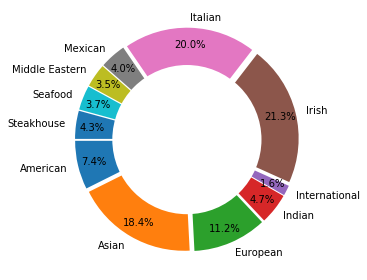

In [10]:
labels = cuisines_df.index
sizes = cuisines_df.Name
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.tight_layout()
plt.savefig('pics/Cuisines_style.png', bbox_inches='tight', format='png', dpi=500)
plt.show()